In [141]:
# export to html
! jupyter nbconvert --to html Choose2BeCurious_Analyses.ipynb

[NbConvertApp] Converting notebook Choose2BeCurious_Analyses.ipynb to html
[NbConvertApp] Writing 3297921 bytes to Choose2BeCurious_Analyses.html


# Step 1: Rename files removing spaces
This first deletes .docx files and then renames the .txt files to remove spaces and replaces with underscore so Python doesn't have errors.

In [71]:
import os
import glob
import shutil

path = "/Users/amandamcgowan/opt/anaconda3/envs/gt/C2BC_Transcripts/"
outpath = "/Users/amandamcgowan/opt/anaconda3/envs/gt/transcripts_preprocessed/"

# First let's delete all files that aren't .txt files
files_in_directory = os.listdir(path)
filtered_files = [file for file in files_in_directory if file.endswith(".docx")]

for file in filtered_files:
    path_to_file = os.path.join(path, file)
    os.remove(path_to_file)

In [73]:
# second let's rename files to make easier to deal with
import os
import glob
import shutil

path = "/Users/amandamcgowan/opt/anaconda3/envs/gt/C2BC_Transcripts/"
outpath = "/Users/amandamcgowan/opt/anaconda3/envs/gt/transcripts_preprocessed/"

# First let's delete all files that aren't .txt files
files_in_directory = os.listdir(path)

# Second, let's rename files to remove spaces in file names
for filename in files_in_directory:
    new_filename = filename[:8] + ".txt"
    os.rename(path+filename, outpath+new_filename)

# Step 2: Use ReadTranscriptsExtractDialogue.Rmd
This cleans the transcripts to remove patterns of the Speaker : or Name: in the transcripts.

# Step 3: Create list of titles for all transcripts
This will be used for extracting the titles of the documents.

In [74]:
import os

# set up path 
path = "/Users/amandamcgowan/opt/anaconda3/envs/gt/transcripts_preprocessed"
files = os.listdir(path)

# set up file for writing titles to 
titles_txt = open("titles.txt", "w") 

# get list of file names for use as titles in analyses below
files_txt = [f for f in files if f.endswith('.txt')]

# loop over each element in list and write to .txt
for title in files_txt:
    titles_txt.write(title + "\n")
titles_txt.close()

# Step 4: Clean text 
This removes puncutation and numbers.

In [106]:
import string
import os

# function to define files without hidden files
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f
            
# load files
path = "/Users/amandamcgowan/opt/anaconda3/envs/gt/transcripts_preprocessed/"
outpath = "/Users/amandamcgowan/opt/anaconda3/envs/gt/transcripts_clean/"
files_in_directory = listdir_nohidden(path)
filtered_files = [file for file in files_in_directory if file.endswith(".txt")]

for f in filtered_files:
    filename = path + f
    file = open(filename, 'rt')
    text = file.read()
    file.close

    # split into words by white space
    words = text.split()

    # make all same case (remove upper case etc)
    words = [word.lower() for word in words]

    # remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]

    # remove numbers
    stripped_nodigits = []
    for s in stripped:
        if not s.isdigit():
            stripped_nodigits.append(s)
    
    clean_file = outpath + f
    with open(clean_file, "w") as outfile:
        print(" ".join(stripped_nodigits), file=outfile)
        outfile.close()

# Step 5: Merge all cleaned transcript files into large file 
This puts each transcript as a line in a new database file (see R code).

# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [130]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [131]:
path_data = ''

## texts
fname_data = 'corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = 'titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [132]:
i_doc = 0
print(titles[3])
print(texts[i_doc][:10])


C2BC-039.txt
['trauma', 'the', 'shame', 'all', 'of', 'that', 'within', 'incarceration', 'and', 'so']


# Fitting the model

In [133]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

<NestedBlockState object, with base <BlockState object with 13239 blocks (111 nonempty), degree-corrected, for graph <Graph object, undirected, with 14505 vertices and 91720 edges, 2 internal vertex properties, 1 internal edge property, at 0x19d6a9280>, at 0x1c9f5efa0>, and 5 levels of sizes [(14505, 111), (111, 22), (22, 3), (3, 2), (2, 1)] at 0x1cda49880>


# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

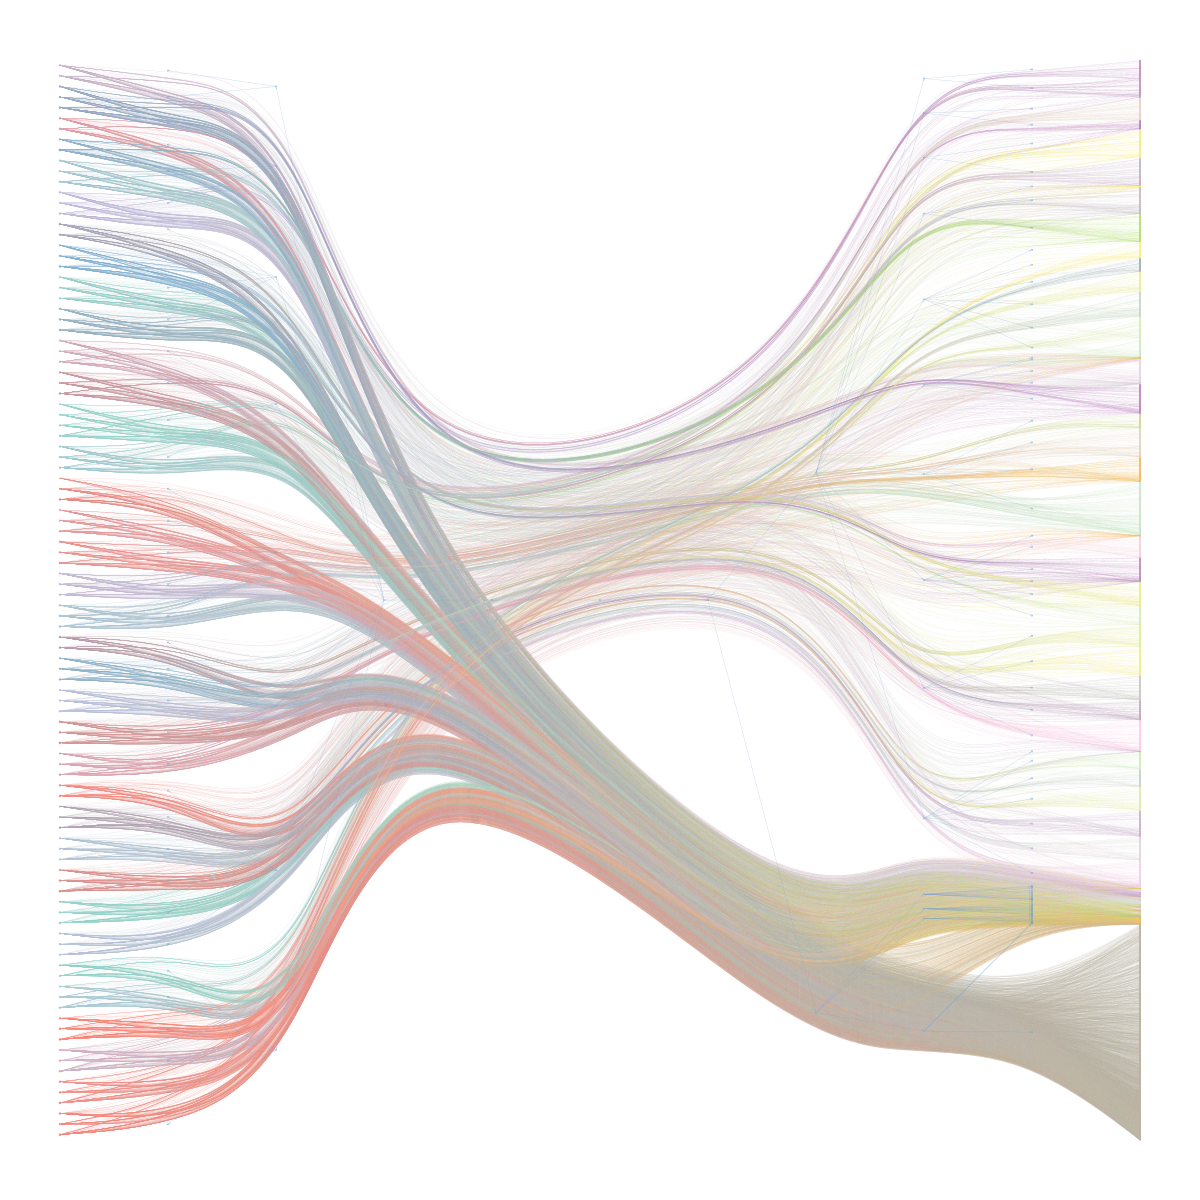

In [142]:
model.plot(filename='Model_SBM.png',nedges=14505)
model.plot(nedges=14505)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [135]:
model.topics(l=1,n=20)

{0: [('advice', 0.011205976520811099),
  ('interview', 0.008804695837780149),
  ('skepticism', 0.0080042689434365),
  ('industry', 0.007737459978655283),
  ('tom', 0.006670224119530417),
  ('random', 0.006670224119530417),
  ('storytelling', 0.0064034151547491995),
  ('businesses', 0.0064034151547491995),
  ('networking', 0.0061366061899679825),
  ('intention', 0.0061366061899679825),
  ('trauma', 0.005869797225186766),
  ('framework', 0.005869797225186766),
  ('faith', 0.005869797225186766),
  ('batman', 0.005602988260405549),
  ('incarcerated', 0.005602988260405549),
  ('interviews', 0.005602988260405549),
  ('elizabeth', 0.005336179295624333),
  ('metaphor', 0.005069370330843116),
  ('genuine', 0.005069370330843116),
  ('meditation', 0.005069370330843116)],
 1: [('you', 0.10384685608348197),
  ('so', 0.06322944902459235),
  ('we', 0.052723978595806235),
  ('was', 0.036123088158874175),
  ('think', 0.03457816603699386),
  ('they', 0.029156893863850227),
  ('people', 0.026390078791028

## Topic-distribution in each document
Which topics contribute to each document?

In [136]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

C2BC-006.txt


[(0, 0.04193410355156183),
 (1, 0.19426615318784768),
 (2, 0.005134788189987163),
 (3, 0.04728284124946513),
 (4, 0.0008557980316645272),
 (5, 0.007488232777064612),
 (6, 0.0038510911424903724),
 (7, 0.1878476679503637),
 (8, 0.0012836970474967907),
 (9, 0.0006418485237483953),
 (10, 0.019255455712451863),
 (11, 0.4884467265725289),
 (12, 0.0002139495079161318),
 (13, 0.0014976465554129225)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [137]:
model.clusters(l=1,n=5)

{0: [('C2BC-022.txt', 1.0),
  ('C2BC-055.txt', 1.0),
  ('C2BC-010.txt', 1.0),
  ('C2BC-028.txt', 1.0),
  ('C2BC-016.txt', 1.0)],
 1: [('C2BC-107.txt', 1.0),
  ('C2BC-056.txt', 1.0),
  ('C2BC-025.txt', 1.0),
  ('C2BC-002.txt', 1.0),
  ('C2BC-052.txt', 1.0)],
 2: [('C2BC-064.txt', 1.0),
  ('C2BC-089.txt', 1.0),
  ('C2BC-081.txt', 1.0),
  ('C2BC-095.txt', 1.0),
  ('C2BC-091.txt', 1.0)],
 3: [('C2BC-093.txt', 1.0),
  ('C2BC-045.txt', 1.0),
  ('C2BC-043.txt', 1.0),
  ('C2BC-067.txt', 1.0),
  ('C2BC-073.txt', 1.0)],
 4: [('C2BC-050.txt', 1.0),
  ('C2BC-015.txt', 1.0),
  ('C2BC-075.txt', 1.0),
  ('C2BC-092.txt', 1.0),
  ('C2BC-090.txt', 1.0)],
 5: [('C2BC-058.txt', 1.0),
  ('C2BC-079.txt', 1.0),
  ('C2BC-017.txt', 1.0),
  ('C2BC-027.txt', 1.0),
  ('C2BC-072.txt', 1.0)],
 6: [('C2BC-068.txt', 1.0),
  ('C2BC-033.txt', 1.0),
  ('C2BC-080.txt', 1.0),
  ('C2BC007', 1.0),
  ('C2BC-034.txt', 1.0)],
 7: [('C2BC-057.txt', 1.0),
  ('.txt', 1.0),
  ('C2BC-040.txt', 1.0),
  ('C2BC-084.txt', 1.0),
  ('.DS

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [138]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 C2BC-013.txt


[(4, 'C2BC-005.txt'),
 (19, 'C2BC-059.txt'),
 (29, 'C2BC-067.txt'),
 (30, 'C2BC-073.txt'),
 (47, 'C2BC-093.txt'),
 (49, 'C2BC-044.txt'),
 (52, 'C2BC-045.txt'),
 (64, 'C2BC-085.txt'),
 (69, 'C2BC-043.txt'),
 (72, 'C2BC-094.txt'),
 (80, 'C2BC-054.txt'),
 (96, 'C2BC-021.txt')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

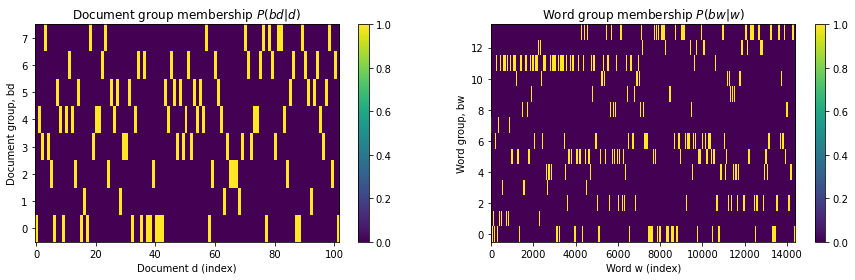

In [139]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()